In [1]:
import os
import random
import shutil

# Paths
TEST0_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256\train"
TEST1_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256\test1"

# Create test1 directory if it doesn't exist
os.makedirs(TEST1_PATH, exist_ok=True)

# Process each class folder in test0
for class_name in os.listdir(TEST0_PATH):
    class_path = os.path.join(TEST0_PATH, class_name)
    
    # Skip if it's not a directory
    if not os.path.isdir(class_path):
        continue
    
    # Get all image files in this class
    images = os.listdir(class_path)
    
    # Randomly select 500 images (or fewer if not enough exist)
    selected_images = random.sample(images, min(500, len(images)))

    # Create corresponding class folder in test1
    test1_class_path = os.path.join(TEST1_PATH, class_name)
    os.makedirs(test1_class_path, exist_ok=True)

    # Copy selected images
    for img_name in selected_images:
        src_path = os.path.join(class_path, img_name)
        dest_path = os.path.join(test1_class_path, img_name)
        shutil.copy2(src_path, dest_path)
    
    print(f"✅ {len(selected_images)} images copied for class '{class_name}'")

print("🎉 All images successfully copied to test1!")


✅ 500 images copied for class 'Biodegradable'
✅ 500 images copied for class 'Hazardous'
✅ 500 images copied for class 'Recyclable'
✅ 500 images copied for class 'Residual'
✅ 500 images copied for class 'Special'
🎉 All images successfully copied to test1!


# daming alam

🔄 Loading Model...
✅ Model Loaded Successfully!
📂 Detected 5 classes: ['Biodegradable', 'Hazardous', 'Recyclable', 'Residual', 'Special']
🖼️ Evaluating Model on Test Images...
🕒 Average Inference Time per Image: 0.08312 seconds
✅ Model Accuracy on Test Set: 99.32%


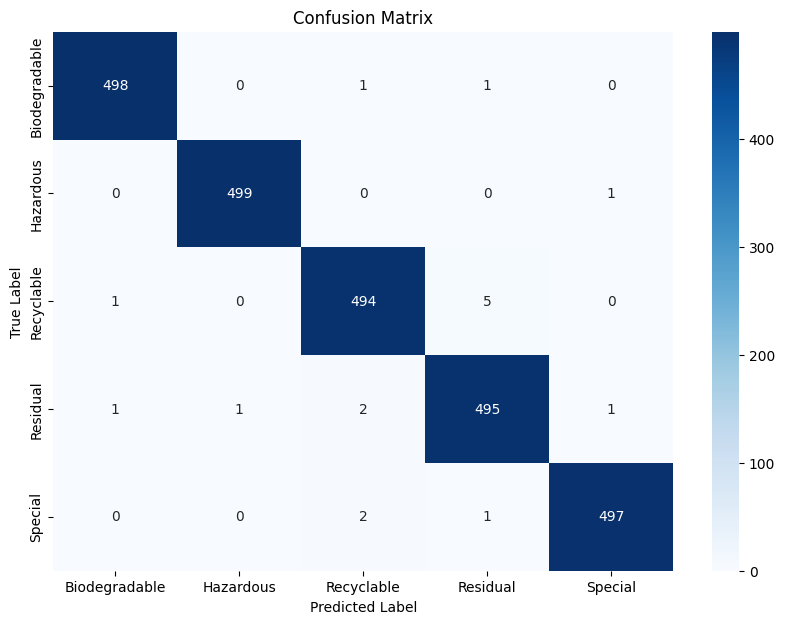

In [15]:
import os
import time
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

# Paths
MODEL_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\model\base256_model.keras"
TEST_DATA_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256\test1"

# Load model
print("🔄 Loading Model...")
model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model Loaded Successfully!")

# Get class names from test0 folder
class_names = sorted(os.listdir(TEST_DATA_PATH))
num_classes = len(class_names)
print(f"📂 Detected {num_classes} classes: {class_names}")

# Initialize results storage
all_labels = []
all_preds = []
inference_times = []

# Process test images
print("🖼️ Evaluating Model on Test Images...")
for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(TEST_DATA_PATH, class_name)
    image_files = os.listdir(class_path)
    
    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(256, 256))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Measure inference time
        start_time = time.time()
        prediction = model.predict(img_array, verbose=0)
        end_time = time.time()

        # Store inference time
        inference_times.append(end_time - start_time)

        # Get predicted class
        predicted_label = np.argmax(prediction)
        all_labels.append(class_index)
        all_preds.append(predicted_label)

# Compute Evaluation Metrics
accuracy = np.mean(np.array(all_labels) == np.array(all_preds))
classification_metrics = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Save Results to CSV
df_metrics = pd.DataFrame(classification_metrics).transpose()
df_metrics.to_csv("model_evaluation_results.csv")

# Compute Average Inference Time
avg_inference_time = np.mean(inference_times)
print(f"🕒 Average Inference Time per Image: {avg_inference_time:.5f} seconds")
print(f"✅ Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Visualization: Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


🔄 Loading Model...
✅ Model Loaded Successfully!
📂 Detected 5 classes: ['Biodegradable', 'Hazardous', 'Recyclable', 'Residual', 'Special']
🖼️ Evaluating Model on Test Images...
🕒 Average Inference Time per Image: 0.11964 seconds
✅ Model Accuracy on Test Set: 63.60%


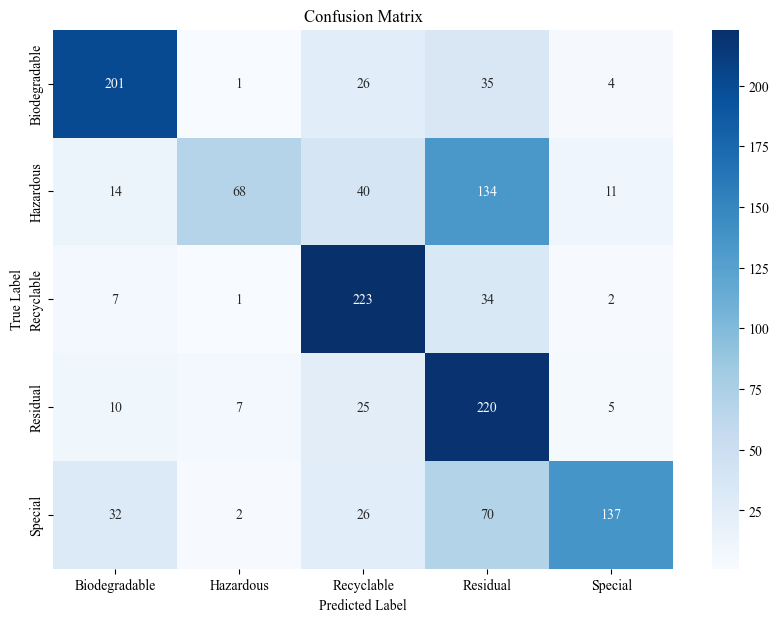

In [9]:
import os
import time
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

# Paths
MODEL_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\model\base256_model.keras"
TEST_DATA_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256_balanced\test"

# Load model
print("🔄 Loading Model...")
model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model Loaded Successfully!")

# Get class names from test0 folder
class_names = sorted(os.listdir(TEST_DATA_PATH))
num_classes = len(class_names)
print(f"📂 Detected {num_classes} classes: {class_names}")

# Initialize results storage
all_labels = []
all_preds = []
inference_times = []

# Process test images
print("🖼️ Evaluating Model on Test Images...")
for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(TEST_DATA_PATH, class_name)
    image_files = os.listdir(class_path)
    
    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(256, 256))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Measure inference time
        start_time = time.time()
        prediction = model.predict(img_array, verbose=0)
        end_time = time.time()

        # Store inference time
        inference_times.append(end_time - start_time)

        # Get predicted class
        predicted_label = np.argmax(prediction)
        all_labels.append(class_index)
        all_preds.append(predicted_label)

# Compute Evaluation Metrics
accuracy = np.mean(np.array(all_labels) == np.array(all_preds))
classification_metrics = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Save Results to CSV
df_metrics = pd.DataFrame(classification_metrics).transpose()
df_metrics.to_csv("model_evaluation_results.csv")

# Compute Average Inference Time
avg_inference_time = np.mean(inference_times)
print(f"🕒 Average Inference Time per Image: {avg_inference_time:.5f} seconds")
print(f"✅ Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Visualization: Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix2.png")
plt.show()


📥 Loading model...
✅ Model loaded successfully!
📂 Loading test dataset...
Found 25000 images belonging to 5 classes.
🔍 Evaluating model...


c:\Users\marty\Desktop\SUPER REVISED CODE\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 553s 707ms/step
📊 Metrics saved to: C:\Users\marty\Desktop\SUPER REVISED CODE\confusion_metrics.csv

📌 Confusion Matrix:
               Biodegradable  Hazardous  Recyclable  Residual  Special
Biodegradable           3050         27         711      1058      154
Hazardous                577        909         780      2399      335
Recyclable               408         35        3386      1071      100
Residual                 292        102         570      3933      103
Special                  629         37         827      1286     2221


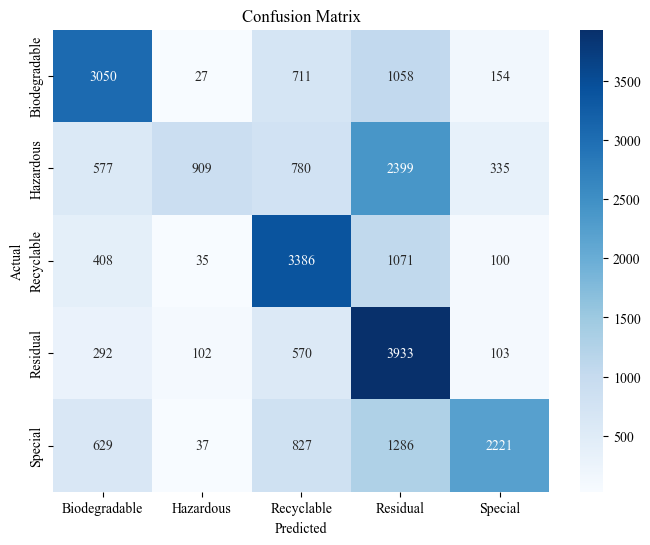


📌 Model Performance Metrics:
        Class  Precision  Recall  F1-Score
Biodegradable   0.615416 0.61000  0.612696
    Hazardous   0.818919 0.18180  0.297545
   Recyclable   0.539688 0.67720  0.600674
     Residual   0.403509 0.78660  0.533397
      Special   0.762444 0.44420  0.561355
      Overall   0.539960 0.53996  0.521133

🎉 Task Complete!


In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Paths
model_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\model\base256_model.keras"
test_folder = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256_balanced\test"
output_csv = r"C:\Users\marty\Desktop\SUPER REVISED CODE\confusion_metrics.csv"

# Class labels
class_labels = ["Biodegradable", "Hazardous", "Recyclable", "Residual", "Special"]

# Load the trained model
print("📥 Loading model...")
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# Load test dataset
print("📂 Loading test dataset...")
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels and predictions
print("🔍 Evaluating model...")
true_labels = test_generator.classes
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Compute metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average=None)
recall = recall_score(true_labels, pred_labels, average=None)
f1 = f1_score(true_labels, pred_labels, average=None)

# Save results to CSV
df_metrics = pd.DataFrame({
    "Class": class_labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})
df_metrics.loc[len(df_metrics)] = ["Overall", accuracy, np.mean(recall), np.mean(f1)]
df_metrics.to_csv(output_csv, index=False)
print(f"📊 Metrics saved to: {output_csv}")

# Print confusion matrix
print("\n📌 Confusion Matrix:")
df_cm = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print(df_cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print table without borders except for header separator
print("\n📌 Model Performance Metrics:")
table_str = df_metrics.to_string(index=False, header=True)
header_line = "=" * len(table_str.split("\n")[0])  # Header separator (1.15 thickness approximation)
print(table_str.replace("=", "-"))  # Print table with header separator

print("\n🎉 Task Complete!")


📥 Loading model...
⏳ Running inference on 2500 images...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  1%|          | 1/100 [00:00<00:12,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  3%|▎         | 3/100 [00:00<00:08, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  5%|▌         | 5/100 [00:00<00:14,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  7%|▋         | 7/100 [00:00<00:10,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  9%|▉         | 9/100 [00:00<00:08, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 11%|█         | 11/100 [00:01<00:07, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 13%|█▎        | 13/100 [00:01<00:07, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 15%|█▌        | 15/100 [00:01<00:06, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 17%|█▋        | 17/100 [00:01<00:06, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 19%|█▉        | 19/100 [00:01<00:06, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 21%|██        | 21/100 [00:01<00:05, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 23%|██▎       | 23/100 [00:01<00:05, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 25%|██▌       | 25/100 [00:02<00:05, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 27%|██▋       | 27/100 [00:02<00:04, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 29/100 [00:02<00:04, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 31%|███       | 31/100 [00:02<00:04, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 33%|███▎      | 33/100 [00:02<00:04, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 35%|███▌      | 35/100 [00:02<00:04, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 37%|███▋      | 37/100 [00:02<00:04, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 39%|███▉      | 39/100 [00:03<00:04, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 41%|████      | 41/100 [00:03<00:04, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 43%|████▎     | 43/100 [00:03<00:03, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 45%|████▌     | 45/100 [00:03<00:03, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 47%|████▋     | 47/100 [00:03<00:03, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 49%|████▉     | 49/100 [00:03<00:03, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 51%|█████     | 51/100 [00:03<00:03, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 53%|█████▎    | 53/100 [00:03<00:03, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 55%|█████▌    | 55/100 [00:04<00:03, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 57%|█████▋    | 57/100 [00:04<00:02, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|█████▉    | 59/100 [00:04<00:02, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 61%|██████    | 61/100 [00:04<00:02, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 63%|██████▎   | 63/100 [00:04<00:02, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 65%|██████▌   | 65/100 [00:04<00:02, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 67%|██████▋   | 67/100 [00:04<00:02, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 69%|██████▉   | 69/100 [00:05<00:02, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 71%|███████   | 71/100 [00:05<00:01, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 73%|███████▎  | 73/100 [00:05<00:01, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 75%|███████▌  | 75/100 [00:05<00:01, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 77%|███████▋  | 77/100 [00:05<00:01, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 79%|███████▉  | 79/100 [00:05<00:01, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 81%|████████  | 81/100 [00:05<00:01, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 83%|████████▎ | 83/100 [00:05<00:01, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 85%|████████▌ | 85/100 [00:06<00:00, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████▋ | 87/100 [00:06<00:00, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 89%|████████▉ | 89/100 [00:06<00:00, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 91%|█████████ | 91/100 [00:06<00:00, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 93%|█████████▎| 93/100 [00:06<00:00, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 95%|█████████▌| 95/100 [00:06<00:00, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 97%|█████████▋| 97/100 [00:06<00:00, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 99%|█████████▉| 99/100 [00:07<00:00, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]

✅ Average inference time per image: 0.0693 seconds


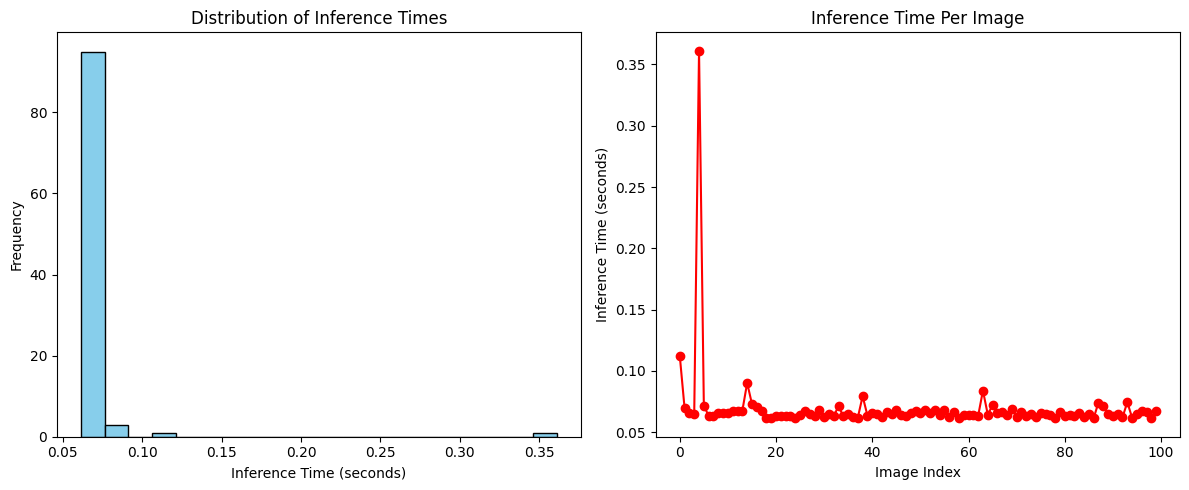

In [16]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Paths
MODEL_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\model\base256_model.keras"
TEST1_PATH = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256\test1"

# Load Model
print("📥 Loading model...")
model = tf.keras.models.load_model(MODEL_PATH)

# Collect test images
image_paths = []
for subfolder in os.listdir(TEST1_PATH):
    subfolder_path = os.path.join(TEST1_PATH, subfolder)
    if os.path.isdir(subfolder_path):
        images = [os.path.join(subfolder_path, img) for img in os.listdir(subfolder_path)]
        image_paths.extend(images)

# Process images and measure inference time
run_times = []
print(f"⏳ Running inference on {len(image_paths)} images...")

for img_path in tqdm(image_paths[:100]):  # Limit to 100 for faster testing
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    start_time = time.time()
    model.predict(img)  # Run model prediction
    end_time = time.time()

    run_times.append(end_time - start_time)

# Compute statistics
average_time = np.mean(run_times)
print(f"✅ Average inference time per image: {average_time:.4f} seconds")

# Plot results
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(run_times, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Inference Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Inference Times")

# Line graph
plt.subplot(1, 2, 2)
plt.plot(range(len(run_times)), run_times, marker='o', linestyle='-', color='red')
plt.xlabel("Image Index")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time Per Image")

plt.tight_layout()
plt.show()


# Zero sa peer eval

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━

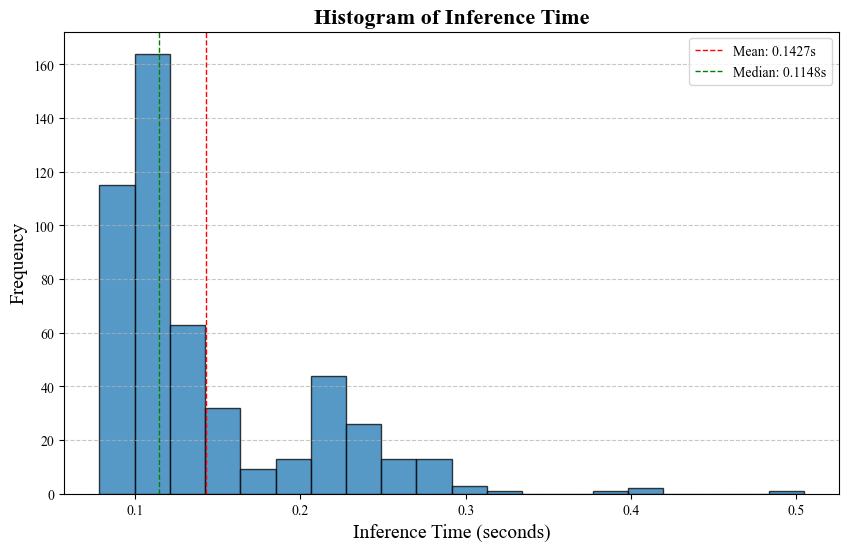

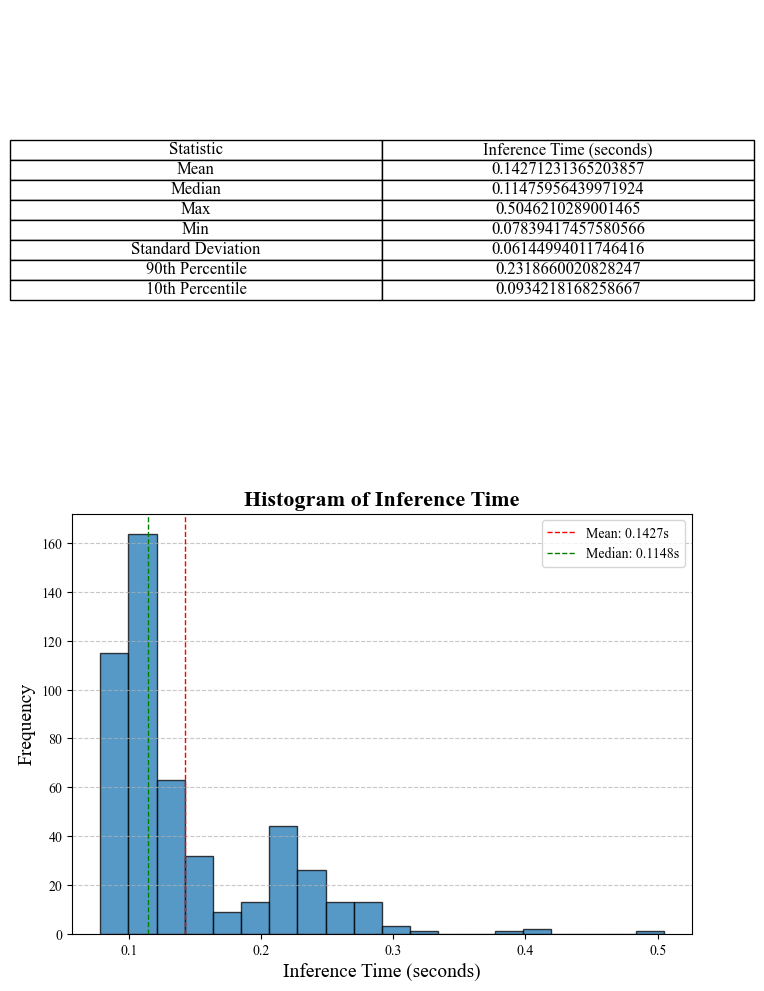

In [5]:
import numpy as np
import tensorflow as tf
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing import image

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Load the trained model
model_path = "C:/Users/marty/Desktop/SUPER REVISED CODE/model/base256_model.keras"
model = tf.keras.models.load_model(model_path)

# Path to test images
test_path = "C:/Users/marty/Desktop/SUPER REVISED CODE/base256/test"
classes = ["Biodegradable", "Hazardous", "Recyclable", "Residual", "Special"]

# Get a list of test images
test_images = []
for cls in classes:
    cls_path = os.path.join(test_path, cls)
    test_images.extend([os.path.join(cls_path, img) for img in os.listdir(cls_path)])

# Take a random sample of 500 images for a more comprehensive analysis
test_images = np.random.choice(test_images, 500, replace=False)

# Measure inference time
inference_times = []
for img_path in test_images:
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    start_time = time.time()
    prediction = model.predict(img_array)
    end_time = time.time()

    inference_time = end_time - start_time
    inference_times.append(inference_time)

# Compute statistics
mean_time = np.mean(inference_times)
max_time = np.max(inference_times)
min_time = np.min(inference_times)
std_dev_time = np.std(inference_times)
median_time = np.median(inference_times)
percentile_90 = np.percentile(inference_times, 90)
percentile_10 = np.percentile(inference_times, 10)

# Create a DataFrame for table display
data_summary = {
    "Statistic": ["Mean", "Median", "Max", "Min", "Standard Deviation", "90th Percentile", "10th Percentile"],
    "Inference Time (seconds)": [mean_time, median_time, max_time, min_time, std_dev_time, percentile_90, percentile_10]
}
df_summary = pd.DataFrame(data_summary)

# Plot histogram
plt.figure(figsize=(10, 6))

plt.hist(inference_times, bins=20, edgecolor='black', alpha=0.75)  # Histogram with edges for readability
plt.axvline(mean_time, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_time:.4f}s')
plt.axvline(median_time, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_time:.4f}s')

plt.xlabel("Inference Time (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Inference Time", fontsize=16, fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid lines for better readability

# Save figure as an image
plt.savefig("C:/Users/marty/Desktop/SUPER REVISED CODE/inference_time_analysis.png", dpi=300, bbox_inches='tight')

# Display table and histogram together
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

# Plot Table
ax[0].axis("tight")
ax[0].axis("off")
table = ax[0].table(cellText=df_summary.values, colLabels=df_summary.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust table size

# Plot Histogram Again
ax[1].hist(inference_times, bins=20, edgecolor='black', alpha=0.75)
ax[1].axvline(mean_time, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_time:.4f}s')
ax[1].axvline(median_time, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_time:.4f}s')
ax[1].set_xlabel("Inference Time (seconds)", fontsize=14)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_title("Histogram of Inference Time", fontsize=16, fontweight="bold")
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Save the combined figure
plt.savefig("C:/Users/marty/Desktop/SUPER REVISED CODE/inference_time_report.png", dpi=300, bbox_inches='tight')
plt.show()


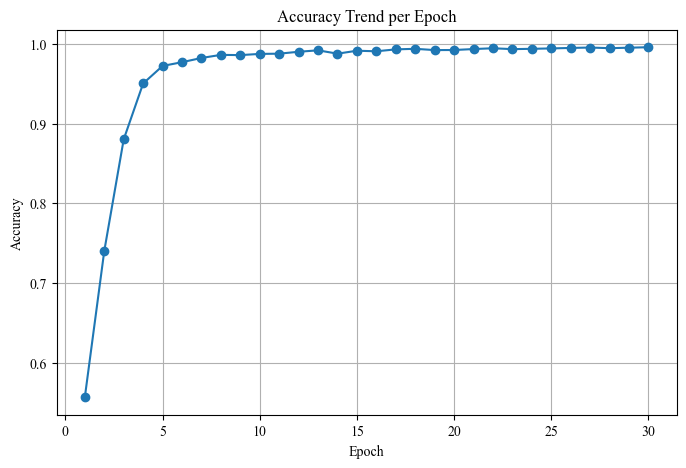

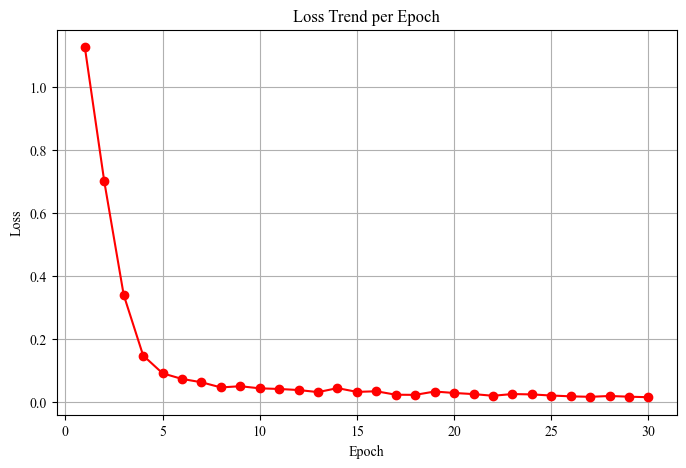

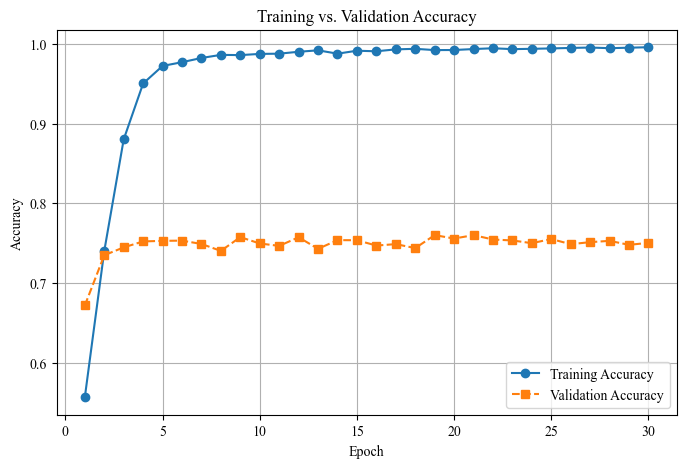

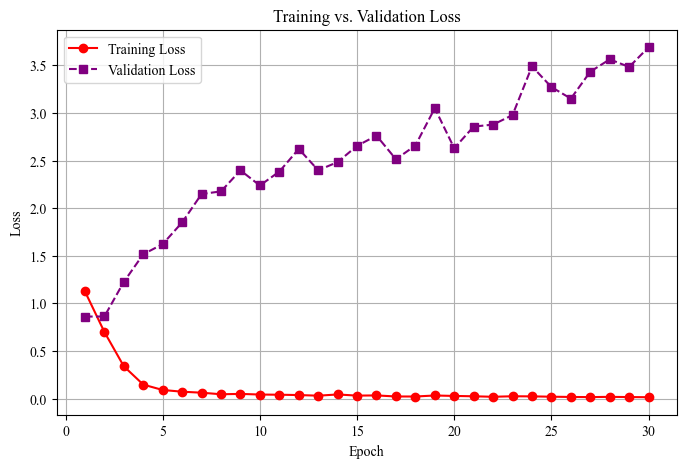

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\training_results.csv"

# Load CSV
df = pd.read_csv(file_path)

# Ensure correct column names
expected_columns = ["Epoch", "Accuracy", "Loss", "Val Accuracy", "Val Loss"]
if not all(col in df.columns for col in expected_columns):
    print("Error: CSV file is missing required columns.")
    exit()

# Plot Accuracy Trend
plt.figure(figsize=(8, 5))
plt.plot(df["Epoch"], df["Accuracy"], marker='o', linestyle='-', label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Trend per Epoch")
plt.grid(True)
plt.show()

# Plot Loss Trend
plt.figure(figsize=(8, 5))
plt.plot(df["Epoch"], df["Loss"], marker='o', linestyle='-', label="Training Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Trend per Epoch")
plt.grid(True)
plt.show()

# Compare Training vs. Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(df["Epoch"], df["Accuracy"], marker='o', linestyle='-', label="Training Accuracy")
plt.plot(df["Epoch"], df["Val Accuracy"], marker='s', linestyle='--', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Compare Training vs. Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(df["Epoch"], df["Loss"], marker='o', linestyle='-', label="Training Loss", color='red')
plt.plot(df["Epoch"], df["Val Loss"], marker='s', linestyle='--', label="Validation Loss", color='purple')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()
